In order to explore the unsupervised and supervised classification we will use a dataset of cats and dogs.

Run the following lines to download and unzip the dataset:

In [1]:
!wget --no-check-certificate -r 'http://www.i3s.unice.fr/~sanabria/files/animals_dataset.zip' -O animals_dataset.zip
!unzip -qq animals_dataset.zip
!ls animals_dataset

will be placed in the single file you specified.

--2020-09-22 07:53:50--  http://www.i3s.unice.fr/~sanabria/files/animals_dataset.zip
Resolving www.i3s.unice.fr (www.i3s.unice.fr)... 134.59.130.2
Connecting to www.i3s.unice.fr (www.i3s.unice.fr)|134.59.130.2|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45012040 (43M) [application/zip]
Saving to: ‘animals_dataset.zip’

animals_dataset.zip 100%[===================>]  42.93M  18.9MB/s    in 2.3s    

2020-09-22 07:53:53 (18.9 MB/s) - ‘animals_dataset.zip’ saved [45012040/45012040]

FINISHED --2020-09-22 07:53:53--
Total wall clock time: 2.7s
Downloaded: 1 files, 43M in 2.3s (18.9 MB/s)
cats  dogs


In [2]:
import os

classes = os.listdir("animals_dataset")
print('classes:\n',classes)

classes:
 ['cats', 'dogs']


Let's explore the images of the class *cats*

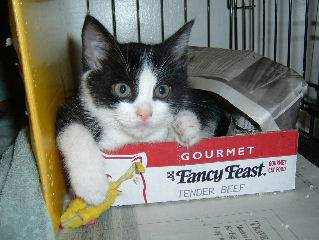

In [23]:
from google.colab.patches import cv2_imshow
import cv2
import glob

path_files_per_class = glob.glob("animals_dataset/cats/*")
image_id_to_see = 101
image_path = path_files_per_class[image_id_to_see]

##Read the image 
image = cv2.imread(image_path)

## Show the image
cv2_imshow(image)

Let's explore the iamges of the class *dogs*

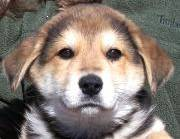

In [27]:
path_files_per_class = glob.glob("animals_dataset/dogs/*")
image_id_to_see = 120
image_path = path_files_per_class[image_id_to_see]

##Read the image 
image = cv2.imread(image_path)

## Show the image
cv2_imshow(image)

Now, let's read the entire dataset as we did in the last TD

In [34]:
#array of images
X = []
for class_name in classes:
  class_path = "animals_dataset/" + class_name
  for image_path in glob.glob(class_path + "/*.jpg"):
    X.append(image_path)

In [35]:
#array of labels
y = []
for image_path in X:
  y.append(image_path.split('/')[-2])
print(y)

['cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats', 'cats',

In [36]:
print('data array length:',len(X))
print('class array length:',len(y))

print('X:',X)
print('y:',y)

data array length: 2000
class array length: 2000
X: ['animals_dataset/cats/cats_00551.jpg', 'animals_dataset/cats/cats_00090.jpg', 'animals_dataset/cats/cats_00198.jpg', 'animals_dataset/cats/cats_00892.jpg', 'animals_dataset/cats/cats_00840.jpg', 'animals_dataset/cats/cats_00754.jpg', 'animals_dataset/cats/cats_00348.jpg', 'animals_dataset/cats/cats_00841.jpg', 'animals_dataset/cats/cats_00976.jpg', 'animals_dataset/cats/cats_00978.jpg', 'animals_dataset/cats/cats_00442.jpg', 'animals_dataset/cats/cats_00905.jpg', 'animals_dataset/cats/cats_00328.jpg', 'animals_dataset/cats/cats_00004.jpg', 'animals_dataset/cats/cats_00800.jpg', 'animals_dataset/cats/cats_00763.jpg', 'animals_dataset/cats/cats_00998.jpg', 'animals_dataset/cats/cats_00321.jpg', 'animals_dataset/cats/cats_00781.jpg', 'animals_dataset/cats/cats_00668.jpg', 'animals_dataset/cats/cats_00485.jpg', 'animals_dataset/cats/cats_00542.jpg', 'animals_dataset/cats/cats_00847.jpg', 'animals_dataset/cats/cats_00743.jpg', 'animals_da

In [38]:
#transform images name and labels into 0 and 1
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
print(y)

[0 0 0 ... 1 1 1]


In [39]:
from sklearn.model_selection import train_test_split

#split the dataset in 3 group : train, test and validation

X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2, stratify=y) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test) 

print('training samples:',len(X_train))
print('testing samples:',len(X_test))
print('validation samples:',len(X_val))

training samples: 1600
testing samples: 200
validation samples: 200


Not all the images of the dataset have the same size. We will resize all the images to 32x32

In [40]:
#resize the images in order to make the task easier for the algorithm
import numpy as np
def read_images(X):
  X_image = []
  for image_path in X:
    image = cv2.imread(image_path) 
    image_resize = cv2.resize(image, (32, 32))
    X_image.append(image_resize)
  return np.asarray(X_image)

In [41]:
#resizing
X_train_image = read_images(X_train)
X_test_image = read_images(X_test)
X_val_image = read_images(X_val)

print("Training set shape: ", X_train_image.shape)
print("Testing set shape: ", X_test_image.shape)
print("Validation set shape: ", X_val_image.shape)

Training set shape:  (1600, 32, 32, 3)
Testing set shape:  (200, 32, 32, 3)
Validation set shape:  (200, 32, 32, 3)


For *k-means* and *knn* is important to have a 1-dimensional array per image.

In [42]:
#flatten the image because can means can only use vectors
X_train_image_flatten = X_train_image.reshape(X_train_image.shape[0], X_train_image.shape[1] * X_train_image.shape[2] * X_train_image.shape[3])
X_test_image_flatten = X_test_image.reshape(X_test_image.shape[0], -1)
X_val_image_flatten = X_val_image.reshape(X_val_image.shape[0], -1)

print("Training set shape: ", X_train_image_flatten.shape)
print("Testing set shape: ", X_test_image_flatten.shape)
print("Validation set shape: ", X_val_image_flatten.shape)

Training set shape:  (1600, 3072)
Testing set shape:  (200, 3072)
Validation set shape:  (200, 3072)


Let's start analyzing *k-means*. Skelarn library provides the method k-means. 

We know that k-means is an unsupervised algorithm. And the problem of classifying between dogs and cats is for supervised classification. However, we will see if the problem of separating cats and dogs from the raw pixels is an easy problem as separating the pixels in two clusters.

In [49]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_image_flatten, y_train)
predictions = kmeans.predict(X_test_image_flatten, y_test)

As k-means is an unsupervised classification, the method KMeans of sklearn is not aware of the classes we have defined before. 

We will analyze what is the class 0 and the class 1 for the K-means trained with our cats and dogs dataset.

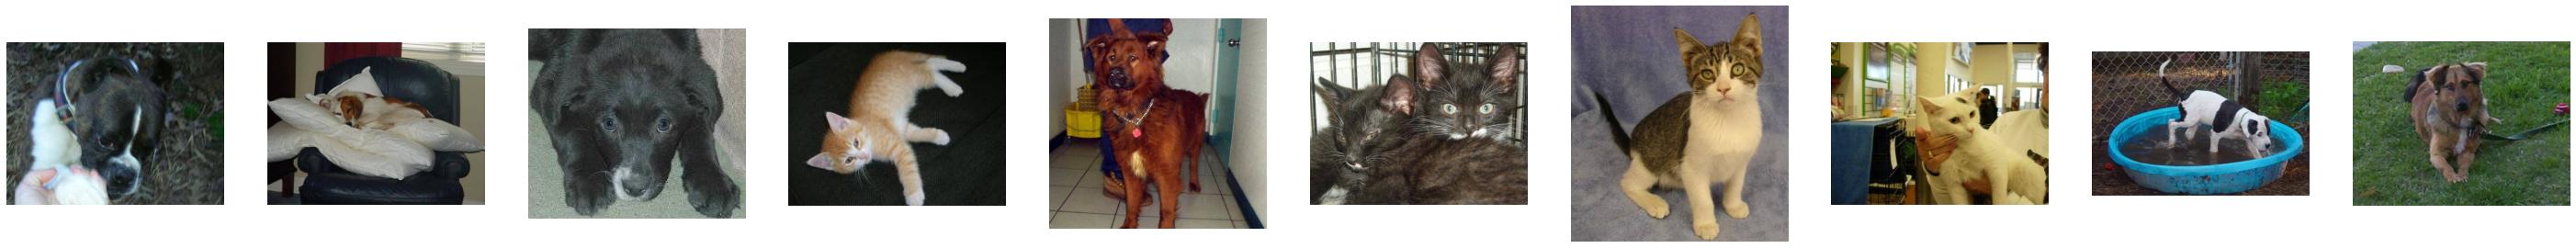

In [55]:
#show how the KMeans algorithm separated our image into 2 new classes without knowing the 1 class (labels)
#here's class 0
import numpy as np
import matplotlib.pyplot as plt

pred_class_0 = np.where(predictions == 0)[0]
images_class_0 = [X_test[idx] for idx in pred_class_0]
nb_imgs_to_show = 10

fig=plt.figure(figsize=(50,100))

for i in range(nb_imgs_to_show):
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  image = cv2.imread(images_class_0[i])
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')

plt.show()

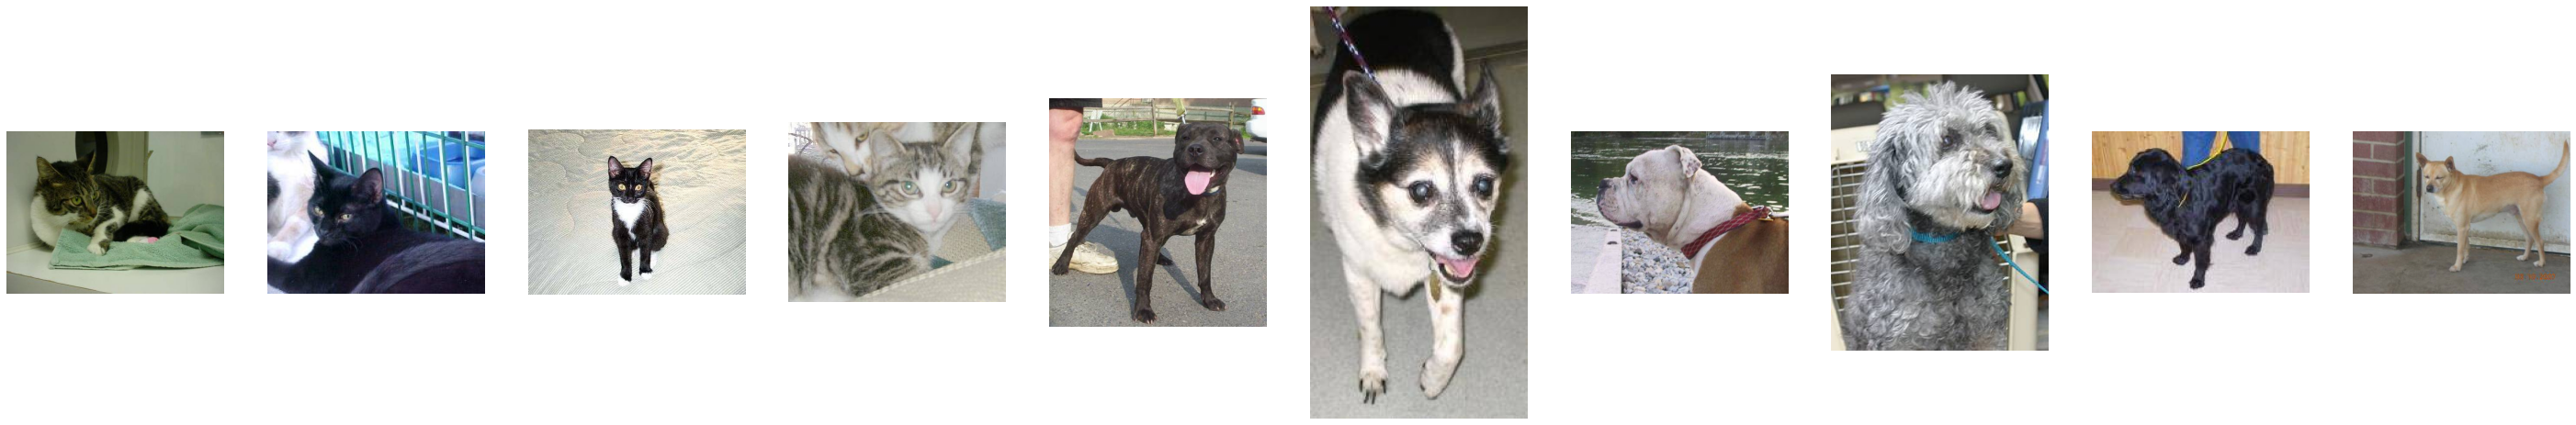

In [56]:
#here's class 1
pred_class_1 = np.where(predictions == 1)[0]
images_class_1 = [X_test[idx] for idx in pred_class_1]
nb_imgs_to_show = 10

fig=plt.figure(figsize=(50,100))

for i in range(nb_imgs_to_show):
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  image = cv2.imread(images_class_1[i])
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')

plt.show()

We just see that is not that easy to split our dataset into two clusters.

Now let's try an algorithm for supervised classification. 

Sklearn also provides a method for knn, KNeighborsClassifier.

**Question**: What is the difference between the k in k-means and the k in knn

k in kmeans in the number of clusters we're looking for

k in knn is the numbers of neighbours we check distance with

In [57]:
#using the knn algorithm and checking the 5 closest neighbours
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_image_flatten, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

The score is the classification accuracy of the model. 0 means all the images were misclassified and 1 means that all the images were correctly classified.

In [60]:
#checking the knn score, its actually pretty bad because we don't check enough neighbours given the size of the dataset
knn.score(X_test_image_flatten, y_test)

0.495

What is the best k for this dataset?

With the following function you can try different k-values and plot the results. The parameters of the function are as follows: 

from_k: Initial value of k you want to try

to_k: Final value of k you want to try

X_train: training dataset

X_val: validation dataset

In [92]:
#checking which k value is the best to use, only went to 100 cause I have a bad machine, the curve should go back down after a while because k checking too many neighbours isn't efficient
import matplotlib.pyplot as plt
def check_results_different_k(from_k, to_k, X_train, X_val):
  scores = []
  k_values = []
  for k in range(from_k, to_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_val, y_val))
    k_values.append(k)
  plt.plot(k_values, scores)
  plt.show()

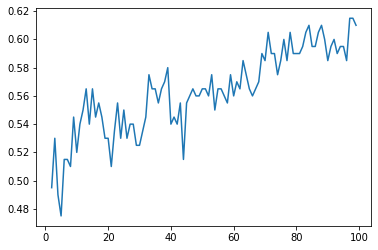

In [93]:
check_results_different_k(2, 100, X_train_image_flatten, X_val_image_flatten)

Now you can test knn with the the k value that gives you the best result in your vallidation set.

**Question:** Why not using directly the test set to find the best value of k?

In [97]:
#values doesn't correspond with the previous prediction because we're now calculating the score on the test set
k_best_result = 100
knn = KNeighborsClassifier(n_neighbors=k_best_result)
knn.fit(X_train_image_flatten, y_train)
knn.score(X_test_image_flatten, y_test)

0.52

What if we reduce the size of the images? 

In [98]:
import numpy as np
def read_images(X):
  X_image = []
  for image_path in X:
    image = cv2.imread(image_path) 
    image_resize = cv2.resize(image, (16, 16))
    X_image.append(image_resize)
  return np.asarray(X_image)

In [99]:
X_train_reshape = read_images(X_train)
X_test_reshape = read_images(X_test)
X_val_reshape = read_images(X_val)

print("Training set shape: ", X_train_reshape.shape)
print("Testing set shape: ", X_test_reshape.shape)
print("Validation set shape: ", X_val_reshape.shape)

Training set shape:  (1600, 16, 16, 3)
Testing set shape:  (200, 16, 16, 3)
Validation set shape:  (200, 16, 16, 3)


In [100]:
X_train_reshape_flatten = X_train_reshape.reshape(X_train_reshape.shape[0], X_train_reshape.shape[1] * X_train_reshape.shape[2] * X_train_reshape.shape[3])
X_test_reshape_flatten = X_test_reshape.reshape(X_test_reshape.shape[0], -1)
X_val_reshape_flatten = X_val_reshape.reshape(X_val_reshape.shape[0], -1)

print("Training set shape: ", X_train_reshape_flatten.shape)
print("Testing set shape: ", X_test_reshape_flatten.shape)
print("Validation set shape: ", X_val_reshape_flatten.shape)

Training set shape:  (1600, 768)
Testing set shape:  (200, 768)
Validation set shape:  (200, 768)


In [102]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=100)
knn.fit(X_train_reshape_flatten, y_train)
knn.score(X_test_reshape_flatten, y_test)

0.535

The results are better?

Results are better (idk the exact reason, might be because with less pixels traits of the animals are way differents)

Is it faster?

It's faster for obvious reasons, there less pixels to check

You can use the following lines to measure the execution time of a program in Python:

```
import time
start_time = time.time()
## Code to measure
print("--- %s seconds ---" % (time.time() - start_time))
```


Maybe you are not using the right value of k for images of size 16x16. Remember you can use the function *check_results_different_k* to check different values of k.


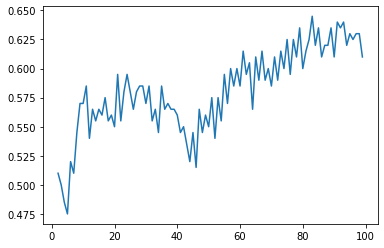

In [103]:
check_results_different_k(2, 100, X_train_reshape_flatten, X_val_reshape_flatten) ## To Complete

In [104]:
k_best_result = 80
knn = KNeighborsClassifier(n_neighbors=k_best_result)
knn.fit(X_train_reshape_flatten, y_train)
knn.score(X_test_reshape_flatten, y_test)

0.565

What if we use black and white images?

In [108]:
import numpy as np
def read_images(X):
  X_image = []
  for image_path in X:
    image = cv2.imread(image_path, 0) #now in black and white because the depth is reduced
    image_resize = cv2.resize(image, (32, 32))
    X_image.append(image_resize)
  return np.asarray(X_image)

In [109]:
X_train_bw = read_images(X_train)
X_test_bw = read_images(X_test)
X_val_bw = read_images(X_val)

print("Training set shape: ", X_train_bw.shape)
print("Testing set shape: ", X_test_bw.shape)
print("Validation set shape: ", X_val_bw.shape)

Training set shape:  (1600, 32, 32)
Testing set shape:  (200, 32, 32)
Validation set shape:  (200, 32, 32)


In [110]:
X_train_bw_flatten = X_train_bw.reshape(X_train_bw.shape[0], X_train_bw.shape[1] * X_train_bw.shape[2])
X_test_bw_flatten = X_test_bw.reshape(X_test_bw.shape[0], -1)
X_val_bw_flatten = X_val_bw.reshape(X_val_bw.shape[0], -1)

print("Training set shape: ", X_train_bw_flatten.shape)
print("Testing set shape: ", X_test_bw_flatten.shape)
print("Validation set shape: ", X_val_bw_flatten.shape)

Training set shape:  (1600, 1024)
Testing set shape:  (200, 1024)
Validation set shape:  (200, 1024)


In [112]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=80)
knn.fit(X_train_bw_flatten, y_train)
knn.score(X_test_bw_flatten, y_test)

0.57

The results are better?

Results are better because blck and white sharpen the edges of the animals in the images (a guess)

Is it faster?

Its faster because there is even way less values to check from RGB (3) to degree of black (1)

Maybe you are not using the right value of k for black and white. Remember you can use the function *check_results_different_k* to check different values of k.

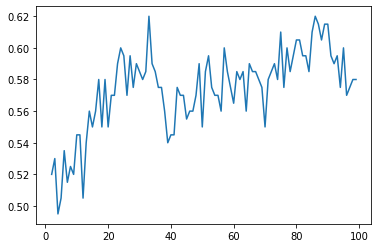

In [113]:
check_results_different_k(2, 100, X_train_bw_flatten, X_val_bw_flatten) ## To Complete

In [114]:
k_best_result = 25
knn = KNeighborsClassifier(n_neighbors=k_best_result)
knn.fit(X_train_bw_flatten, y_train)
knn.score(X_test_bw_flatten, y_test)

0.545

Instead of using directly the pixels of the image, another strategy is to extract features from the images and then use these features to classify.

One of these features is [HOG](https://en.wikipedia.org/wiki/Histogram_of_oriented_gradients) or Histogram of oriented gradients.

Let's see the HOF features of some images in our dataset

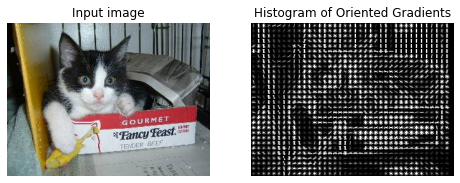

In [117]:
from skimage import exposure
from skimage.feature import hog
image_to_check = 101
image = cv2.imread(X[image_to_check]) 
fd, hog_image = hog(image, multichannel=True, visualize=True)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()

Now, instead of using directly the image pixels, let's find the HOG features of the images.

In [118]:
import numpy as np
from skimage.feature import hog
def get_hog_features(X):
  X_hog = []
  for image_path in X:
    image = cv2.imread(image_path) 
    image_resize = cv2.resize(image, (64, 64))
    fd = hog(image_resize, multichannel=True)
    X_hog.append(fd)
  return np.asarray(X_hog)

In [119]:
X_train_hog = get_hog_features(X_train)
X_test_hog = get_hog_features(X_test)
X_val_hog = get_hog_features(X_val)

print("Training set shape: ", X_train_hog.shape)
print("Testing set shape: ", X_test_hog.shape)
print("Validation set shape: ", X_val_hog.shape)

Training set shape:  (1600, 2916)
Testing set shape:  (200, 2916)
Validation set shape:  (200, 2916)


The results are better?

Maybe you are not using the right value of k for black and white. Remember you can use the function *check_results_different_k* to check different values of k.

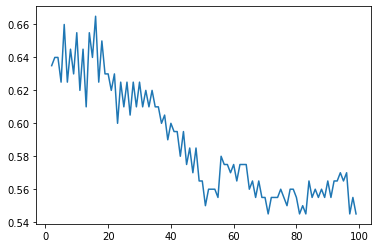

In [120]:
check_results_different_k(2, 100, X_train_hog, X_val_hog) ## To Complete

In [121]:
k_best_result = 15
knn = KNeighborsClassifier(n_neighbors=k_best_result)
knn.fit(X_train_hog, y_train)
knn.score(X_test_hog, y_test)

0.58

sklearn also provides another algorithms based on neighbors like *NearestCentroids*

In [123]:
from sklearn.neighbors import NearestCentroid

nc = NearestCentroid()

nc.fit(X_train_bw_flatten, y_train) #not sure if its the best set
nc.score(X_test_bw_flatten, y_test)

0.535

Try NearestCentroid with the different data we have explored today (X_reshape, X_bw, X_hog)

In [ ]:
## To Complete

# TD2: Task

Now, let's do all the process with your dataset.

*   Read the dataset (Use the two "easy" classes you chose in the last TD.)
*   Try k-means
*   Try knn with 32x32 images
*   Try knn with 16x16 images
*   Try knn with black and white images
*   Try knn with HOG features
*   Try Nearest Centroid

# k-means

In [138]:
#!wget --no-check-certificate -r 'http://www.i3s.unice.fr/~sanabria/files/dataset.zip' -O dataset.zip
#!unzip -qq dataset.zip
#!ls dataset

import os
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

classes = os.listdir("dataset")

#array of images
X = []
for class_name in classes:
  class_path = "dataset/" + class_name
  for image_path in glob.glob(class_path + "/*.jpg"):
    X.append(image_path)

#array of labels
y = []
for image_path in X:
  y.append(image_path.split('/')[-2])

#transform images name and labels into 0 and 1
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)

#split the dataset in 3 group : train, test and validation
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.2, stratify=y) 
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, stratify=y_test) 

#resize the images in order to make the task easier for the algorithm
def read_images(X):
  X_image = []
  for image_path in X:
    image = cv2.imread(image_path) 
    image_resize = cv2.resize(image, (32, 32))
    X_image.append(image_resize)
  return np.asarray(X_image)

#resizing
X_train_image = read_images(X_train)
X_test_image = read_images(X_test)
X_val_image = read_images(X_val)

#flatten the image because can means can only use vectors
X_train_image_flatten = X_train_image.reshape(X_train_image.shape[0], X_train_image.shape[1] * X_train_image.shape[2] * X_train_image.shape[3])
X_test_image_flatten = X_test_image.reshape(X_test_image.shape[0], -1)
X_val_image_flatten = X_val_image.reshape(X_val_image.shape[0], -1)

#kmeans
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_train_image_flatten, y_train)
predictions = kmeans.predict(X_test_image_flatten, y_test)


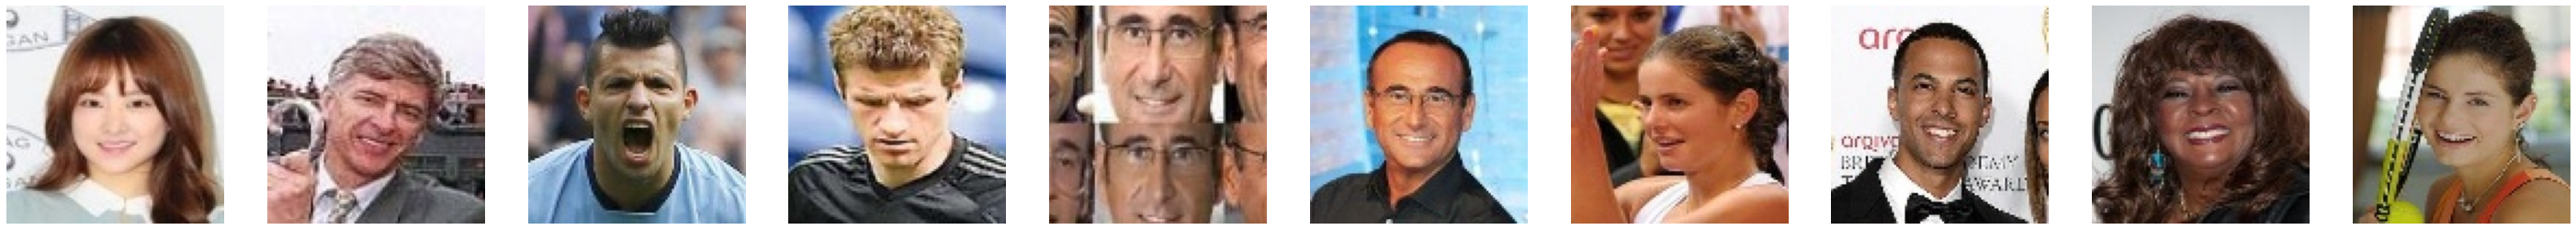

In [139]:
#show how the KMeans algorithm separated our image into 2 new classes without knowing the 1 class (labels)
#here's class 0

pred_class_0 = np.where(predictions == 0)[0]
images_class_0 = [X_test[idx] for idx in pred_class_0]
nb_imgs_to_show = 10

fig=plt.figure(figsize=(50,100))

for i in range(nb_imgs_to_show):
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  image = cv2.imread(images_class_0[i])
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')

plt.show()

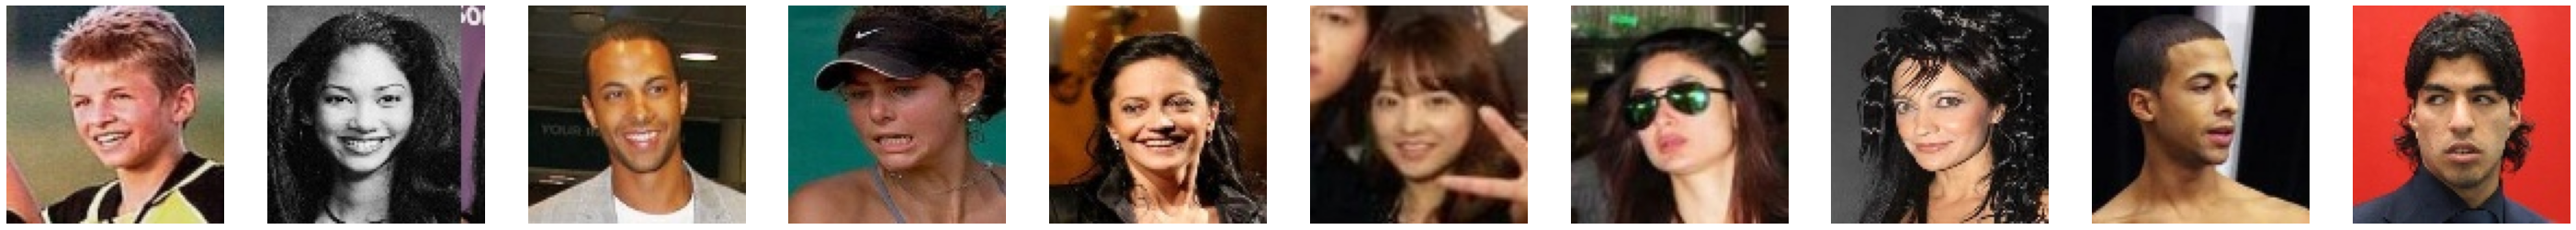

In [140]:
#here's class 1
pred_class_1 = np.where(predictions == 1)[0]
images_class_1 = [X_test[idx] for idx in pred_class_1]
nb_imgs_to_show = 10

fig=plt.figure(figsize=(50,100))

for i in range(nb_imgs_to_show):
  fig.add_subplot(1, nb_imgs_to_show, i+1)
  image = cv2.imread(images_class_1[i])
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')

plt.show()

# KNN

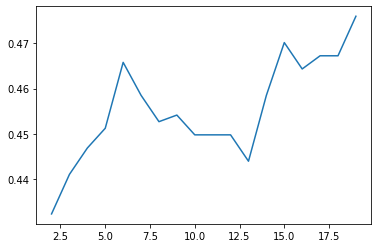

In [144]:
#using the knn algorithm and checking the 5 closest neighbours
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_image_flatten, y_train)

#checking the knn score, its actually pretty bad because we don't check enough neighbours given the size of the dataset
knn.score(X_test_image_flatten, y_test)

#checking which k value is the best to use, only went to 100 cause I have a bad machine, the curve should go back down after a while because k checking too many neighbours isn't efficient
def check_results_different_k(from_k, to_k, X_train, X_val):
  scores = []
  k_values = []
  for k in range(from_k, to_k):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_val, y_val))
    k_values.append(k)
  plt.plot(k_values, scores)
  plt.show()

check_results_different_k(2, 20, X_train_image_flatten, X_val_image_flatten)